# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [1]:
#!pip install git+https://github.com/CristianLazoQuispe/datautils.git

In [2]:
# Example reading the SQL database from here

""" from utils import db_connect
import pandas as pd
engine = db_connect()

dataframe = pd.read_sql("Select * from books;", engine)
print(dataframe.describe()) """

' from utils import db_connect\nimport pandas as pd\nengine = db_connect()\n\ndataframe = pd.read_sql("Select * from books;", engine)\nprint(dataframe.describe()) '

In [3]:
# Example importing the CSV here

# dataframe = pd.read_csv('../path/to/file.csv')
# dataframe.describe()

In [4]:
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap

In [6]:
from datautils.analysis import *

In [7]:
df_airbnb = pd.read_csv('../data/raw/AB_NYC_2019.csv')
#

In [8]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
df_airbnb.sample(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11062,8541991,Comfortable Private Apartment in Heart of Flat...,27615247,Judy,Brooklyn,Midwood,40.62419,-73.96287,Entire home/apt,99,5,67,2019-06-17,1.83,3,27
35691,28334679,Astoria Apartment,29514176,Meghann,Queens,Astoria,40.76642,-73.91637,Entire home/apt,125,3,4,2018-11-25,0.42,1,0
43244,33531011,Sunny Private bedroom in convenient location,41859649,Melissa,Brooklyn,Bushwick,40.70039,-73.92352,Private room,72,2,2,2019-05-06,0.70,1,364
5610,4081800,Classic Brownstone Apartment,4835582,Julia,Manhattan,Harlem,40.80856,-73.94573,Entire home/apt,130,2,185,2019-06-17,3.76,1,300
8671,6660511,Highly Desired LOCATION East V. NYC,34861715,Diana,Manhattan,East Village,40.72639,-73.98875,Entire home/apt,280,2,29,2019-01-01,0.59,1,0


In [10]:
df_airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [11]:
df_airbnb['id'].nunique()

48895

In [12]:
#numeric_desc, categorical_desc = my_df_describe(df_train,name = 'train',show = False,path=PATH_RESULTS,save=False)
numeric_desc, categorical_desc = my_df_describe(df_airbnb,name = 'airbnb',show = True, save=False)

********************airbnb********************
shape  (48895, 16)
**********numerics**********


,count,mean,std,min,25%,50%,75%,max,unique,nulls,nulls_perc
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07,48895,0,0.000000
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08,37457,0,0.000000
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01,19048,0,0.000000
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01,14718,0,0.000000
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04,674,0,0.000000
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03,109,0,0.000000
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02,394,0,0.000000
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01,937,10052,0.205583
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02,47,0,0.000000
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02,366,0,0.000000


**********categorical**********


,count,unique,top,freq,nulls,nulls_perc
name,48879,47905,Hillside Hotel,18,16,0.000327
host_name,48874,11452,Michael,417,21,0.000429
neighbourhood_group,48895,5,Manhattan,21661,0,0.000000
neighbourhood,48895,221,Williamsburg,3920,0,0.000000
room_type,48895,3,Entire home/apt,25409,0,0.000000
last_review,38843,1764,2019-06-23,1413,10052,0.205583


In [13]:
df_airbnb.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [14]:
# remplazar na por 0 : 
df_airbnb.fillna({'reviews_per_month':0},inplace=True)
df_airbnb.reviews_per_month.isna().sum()

0

In [15]:
Long=-73.80
Lat=40.80
locations = list(zip(df_airbnb.latitude, df_airbnb.longitude))

map1 = folium.Map(location=[Lat,Long], zoom_start=9)
FastMarkerCluster(data=locations).add_to(map1)
map1

In [16]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [17]:
 df_airbnb['neighbourhood'] =  df_airbnb['neighbourhood'].astype("category")
 df_airbnb['neighbourhood_group'] =  df_airbnb['neighbourhood_group'].astype("category")

In [18]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              48895 non-null  int64   
 1   name                            48879 non-null  object  
 2   host_id                         48895 non-null  int64   
 3   host_name                       48874 non-null  object  
 4   neighbourhood_group             48895 non-null  category
 5   neighbourhood                   48895 non-null  category
 6   latitude                        48895 non-null  float64 
 7   longitude                       48895 non-null  float64 
 8   room_type                       48895 non-null  object  
 9   price                           48895 non-null  int64   
 10  minimum_nights                  48895 non-null  int64   
 11  number_of_reviews               48895 non-null  int64   
 12  last_review       

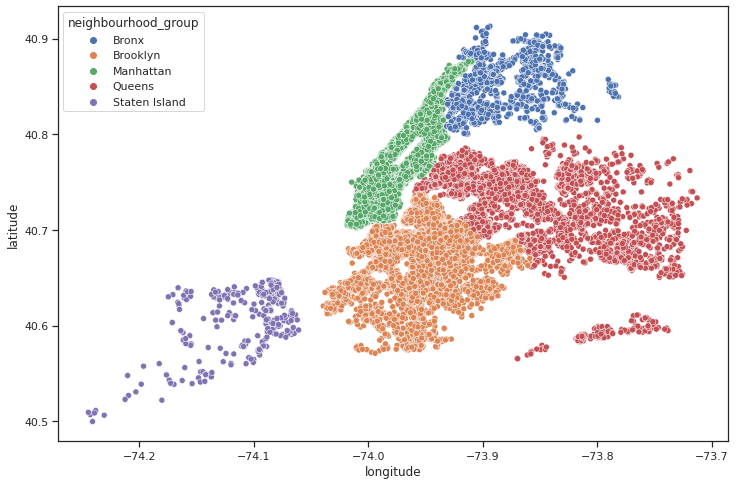

In [19]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_airbnb.longitude,y=df_airbnb.latitude,hue=df_airbnb.neighbourhood_group)
plt.show()

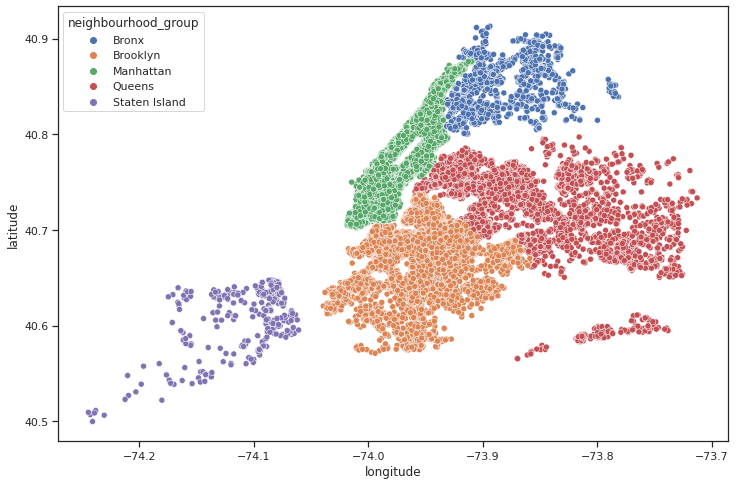

In [20]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_airbnb.longitude,y=df_airbnb.latitude,hue=df_airbnb.neighbourhood_group)
plt.show()

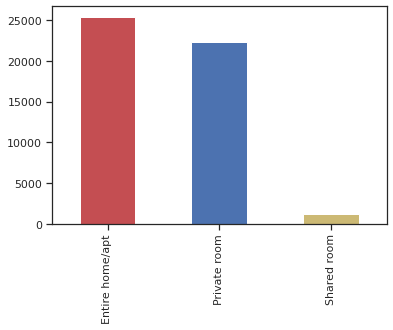

In [21]:
df_airbnb['room_type'].value_counts().plot(kind='bar',color=['r','b','y'])
plt.show()

<AxesSubplot:>

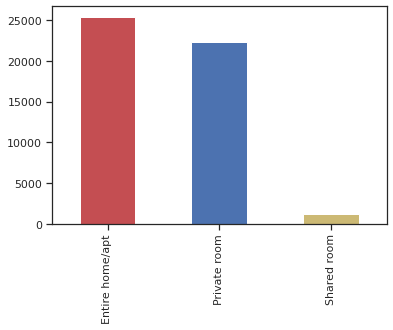

In [22]:
df_airbnb['room_type'].value_counts().plot(kind='bar',color=['r','b','y'])

In [23]:
apt = df_airbnb[df_airbnb['room_type']=='Entire home/apt']
df_apt_group = apt.groupby(['host_id','host_name','neighbourhood','neighbourhood_group']).size().reset_index(name='apartment').sort_values(by=['apartment'],ascending=False)
df_apt_group.head(10)

: 

: 

In [ ]:
df_airnb['price'].describe()